**<font size=6>神经网络与深度学习-HW2</font>**

**<font size=4>Q1-使用CNN网络模型在CIFAR-100上训练并测试</font>**

# 基础设置和数据读入

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR100
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据集处理和预处理
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_set = CIFAR100(root='./data', train=True, download=True, transform=transform_train)
test_set = CIFAR100(root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# 训练测试集划分
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_set, val_set = random_split(train_set, [train_size, val_size])

In [4]:
# 数据加载器
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

# 定义CNN网络模型

In [5]:
# 自定义CNN网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 100)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 128 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 定义训练和测试函数

In [6]:
# 训练函数
def train(model, optimizer, criterion, dataloader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

In [7]:
# 测试函数
def test(model, criterion, dataloader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

# 参数设置

In [9]:
# 参数设置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.001
num_epochs = 20
criterion = nn.CrossEntropyLoss()

# 训练

In [20]:
model = Net().to(device)

# 优化器
optimizer = optim.Adam(model.parameters(), lr=lr)

# 训练和验证循环
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, criterion, train_loader)
    val_loss, val_acc = test(model, criterion, val_loader)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


torch.save(model, 'model.pth')

Epoch [1/20] - Train Loss: 3.7453, Train Acc: 0.1266, Val Loss: 3.3928, Val Acc: 0.1783
Epoch [2/20] - Train Loss: 3.1497, Train Acc: 0.2257, Val Loss: 3.0815, Val Acc: 0.2393
Epoch [3/20] - Train Loss: 2.8850, Train Acc: 0.2792, Val Loss: 2.8655, Val Acc: 0.2827
Epoch [4/20] - Train Loss: 2.6927, Train Acc: 0.3157, Val Loss: 2.7213, Val Acc: 0.3127
Epoch [5/20] - Train Loss: 2.5413, Train Acc: 0.3464, Val Loss: 2.6298, Val Acc: 0.3305
Epoch [6/20] - Train Loss: 2.4165, Train Acc: 0.3739, Val Loss: 2.5164, Val Acc: 0.3637
Epoch [7/20] - Train Loss: 2.3338, Train Acc: 0.3913, Val Loss: 2.5135, Val Acc: 0.3640
Epoch [8/20] - Train Loss: 2.2461, Train Acc: 0.4102, Val Loss: 2.5017, Val Acc: 0.3604
Epoch [9/20] - Train Loss: 2.1884, Train Acc: 0.4199, Val Loss: 2.4267, Val Acc: 0.3769
Epoch [10/20] - Train Loss: 2.1178, Train Acc: 0.4376, Val Loss: 2.3866, Val Acc: 0.3934
Epoch [11/20] - Train Loss: 2.0658, Train Acc: 0.4487, Val Loss: 2.4063, Val Acc: 0.3854
Epoch [12/20] - Train Loss: 2.

# 训练和测试效果评估

In [21]:
# 测试集上评估模型
test_loss, test_acc = test(model, criterion, test_loader)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# CutMix、Cutout和Mixup可视化
cutmix = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomApply([transforms.RandomHorizontalFlip()], p=0.5),
    transforms.ToTensor()
])

cutout = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomApply([transforms.RandomCrop(24)], p=0.5),
    transforms.ToTensor()
])

mixup = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomApply([transforms.RandomVerticalFlip()], p=0.5),
    transforms.ToTensor()
])

Test Loss: 2.1843, Test Acc: 0.4564


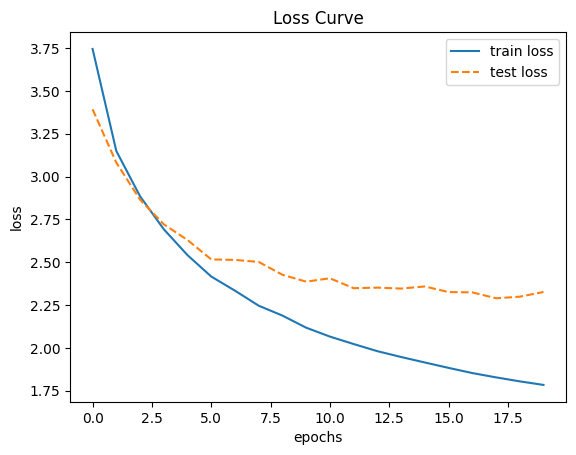

In [22]:
# 训练和测试的loss曲线
x = np.arange(len(train_loss_list))
plt.title("Loss Curve")
plt.plot(x, train_loss_list, label='train loss')
plt.plot(x, val_loss_list, label='test loss', linestyle='--')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig('loss_image.jpg')
plt.show()

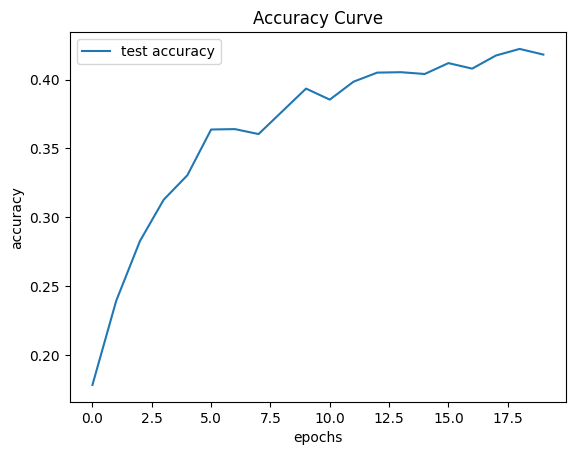

In [23]:
# 测试的accuracy曲线
plt.title("Accuracy Curve")
plt.plot(x, val_acc_list, label='test accuracy')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.savefig('accuracy_image.jpg')
plt.show()

# 可视化训练样本

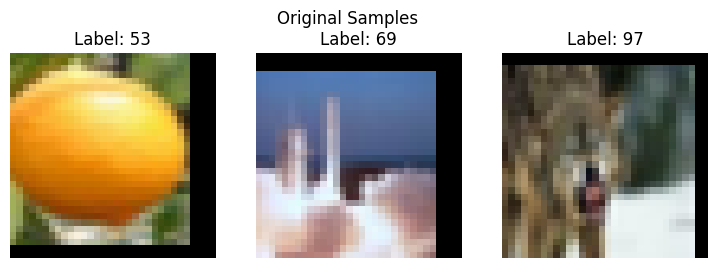

In [41]:
# 可视化三张训练样本
indices = [0, 1, 2]
samples = [train_set[i][0] for i in indices]
labels = [train_set[i][1] for i in indices]
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
# visualize_samples(samples, labels, "Original Samples")
for j in range(3):
    index = j
    image = samples[index].numpy().transpose((1, 2, 0))
    image = (image * 0.5) + 0.5  # 反归一化
    axes[j].imshow(image)
    axes[j].axis('off')
    axes[j].set_title(f"Label: {labels[index]}")
fig.suptitle("Original Samples")
plt.show()

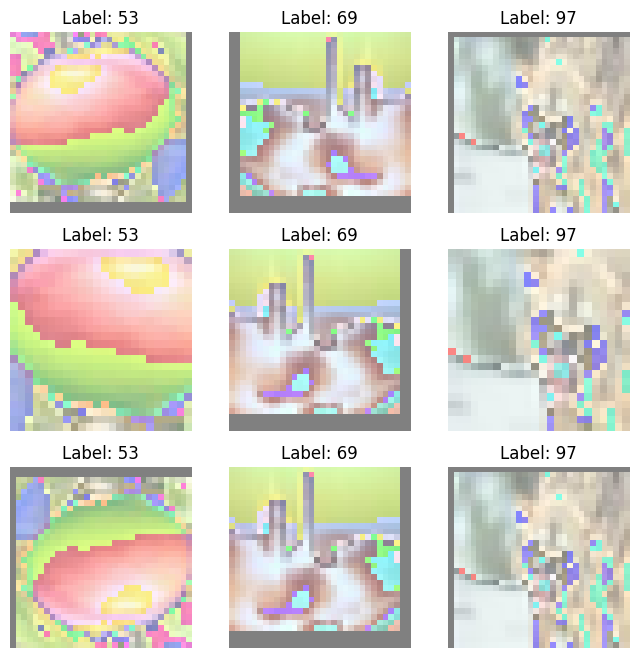

In [33]:
# 对三张训练样本分别经过cutmix, cutout, mixup后进行可视化
indices = [0, 1, 2]
samples = [train_set[i][0] for i in indices]
labels = [train_set[i][1] for i in indices]
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

cutmix_samples = [cutmix(sample) for sample in samples]
for j in range(3):
    index = j
    image = cutmix_samples[index].numpy().transpose((1, 2, 0))
    image = (image * 0.5) + 0.5  # 反归一化
    axes[0, j].imshow(image)
    axes[0, j].axis('off')
    axes[0, j].set_title(f"Label: {labels[index]}")


cutout_samples = [cutout(sample) for sample in samples]
for j in range(3):
    index = j
    image = cutout_samples[index].numpy().transpose((1, 2, 0))
    image = (image * 0.5) + 0.5  # 反归一化
    axes[1, j].imshow(image)
    axes[1, j].axis('off')
    axes[1, j].set_title(f"Label: {labels[index]}")


mixup_samples = [mixup(sample) for sample in samples]
for j in range(3):
    index = j
    image = mixup_samples[index].numpy().transpose((1, 2, 0))
    image = (image * 0.5) + 0.5  # 反归一化
    axes[2, j].imshow(image)
    axes[2, j].axis('off')
    axes[2, j].set_title(f"Label: {labels[index]}")
